# Bayesian AB testing

In [1]:
import numpy as np
from scipy.stats import beta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math

In [2]:
roboto = {'fontname': 'Roboto', 'size': '12'}
roboto_light = {'fontname': 'Roboto', 'size': '10', 'weight': 'light'}
roboto_title = {'fontname': 'Roboto', 'size': '14', 'weight': 'bold'}
roboto_table_header = {'fontname': 'Roboto', 'size': '9', 'weight': 'bold'} 
roboto_small = {'fontname': 'Roboto', 'size': '7.5', 'weight': 'light'}

font = {
    'family': 'sans-serif',
    'sans-serif': 'roboto',
    'size': 11
}

plt.rc('font', **font)

In [17]:
visitors_A = 80000
visitors_B = 80000

conversions_A = 1600
conversions_B = 1696

control_cr = conversions_A/visitors_A
variant_cr = conversions_B/visitors_B

relative_difference = variant_cr/control_cr - 1

In [4]:
alpha_prior = 1
beta_prior = 1

posterior_A = beta(
    alpha_prior + conversions_A,
    beta_prior + visitors_A - conversions_A
)

posterior_B = beta(
    alpha_prior + conversions_B,
    beta_prior + visitors_B - conversions_B
)

samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

prob_A = (samples_posterior_A > samples_posterior_B).mean()
prob_B = (samples_posterior_A <= samples_posterior_B).mean()

In [5]:
font = {
    'family' : 'sans-serif',
    'sans-serif' : 'roboto',
    'size' : 11
}

plt.rc('font', **font)

In [24]:
bayesian_data = {
    "<b>Variant</b>": ['A', 'B'],
    "<b>Visitors</b>": [f"{visitors_A:,}", f"{visitors_B:,}"],
    "<b>Conversions</b>": [conversions_A, conversions_B],
    "<b>Conversion rate</b>": [f"{control_cr:.2%}", f"{variant_cr:.2%}"],
    "<b>Uplift</b>": ['', f"{relative_difference:.2%}"],
    "<b>Likelihood of being better</b>": [f"{prob_A:.2%}", f"{prob_B:.2%}"]
}

df = pd.DataFrame(bayesian_data)
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(bayesian_data.keys()),
        line_color='white', fill_color='white',
        font=dict(size=12, color='black'),
        align="left",
    ),
    cells=dict(
        values=[bayesian_data.get(k) for k in bayesian_data.keys()],
        align="left",
        fill=dict(color=[['#F9F9F9', '#FFFFFF']*5]),
    )
)
])

fig.update_layout(
    autosize=False,
    height=150,
    margin=dict(
        l=20,
        r=20,
        b=10,
        t=30,
    )
)

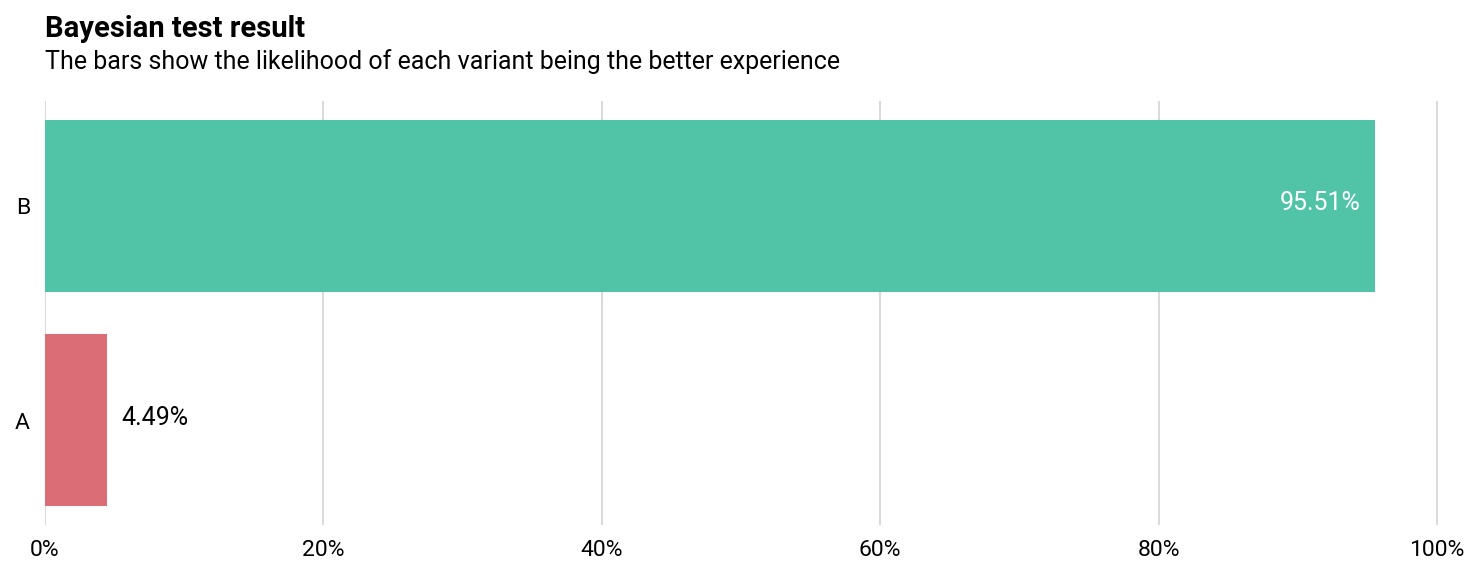

In [6]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
snsplot = ax.barh(['A', 'B'], [prob_A, prob_B], color=['#da6d75', '#51c4a8'])

ax.xaxis.grid(color = 'lightgrey')
ax.set_axisbelow(True)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
sns.despine(left=True, bottom=True)
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False
)

ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1]*1.2,
    'Bayesian test result',
    **roboto_title
)

ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1]*1.1,
    'The bars show the likelihood of each variant being the better experience',
    **roboto
)

# Value annotations conditional on size of bars
if prob_A < 0.2:
    A_xpos = prob_A + 0.01
    A_alignment = 'left'
    A_color = 'black'
    B_xpos = prob_B - 0.01
    B_alignment = 'right'
    B_color = 'white'
elif prob_B < 0.2:
    A_xpos = prob_A - 0.01
    A_alignment = 'right'
    A_color = 'white'
    B_xpos = prob_B + 0.01
    B_alignment = 'left'
    B_color = 'black'
else:
    A_xpos = prob_A - 0.01
    A_alignment = 'right'
    A_color = 'white'
    B_xpos = prob_B - 0.01
    B_alignment = 'right'
    B_color = 'white'


ax.text(
    A_xpos,
    snsplot.patches[0].get_y()+snsplot.patches[0].get_height()/2.1,
    f"{prob_A:.2%}",
    horizontalalignment = A_alignment,
    color = A_color,
    **roboto
)

ax.text(
    B_xpos,
    snsplot.patches[1].get_y()+snsplot.patches[1].get_height()/2.1,
    f"{prob_B:.2%}",
    horizontalalignment = B_alignment,
    color = B_color,
    **roboto
)

fig.tight_layout()

plt.show()

In [7]:
np.min([prob_A, prob_B])

0.0449

In [8]:
def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

In [9]:
difference = samples_posterior_B/samples_posterior_A-1

greater = difference[difference > 0]
lower = difference[difference < 0]

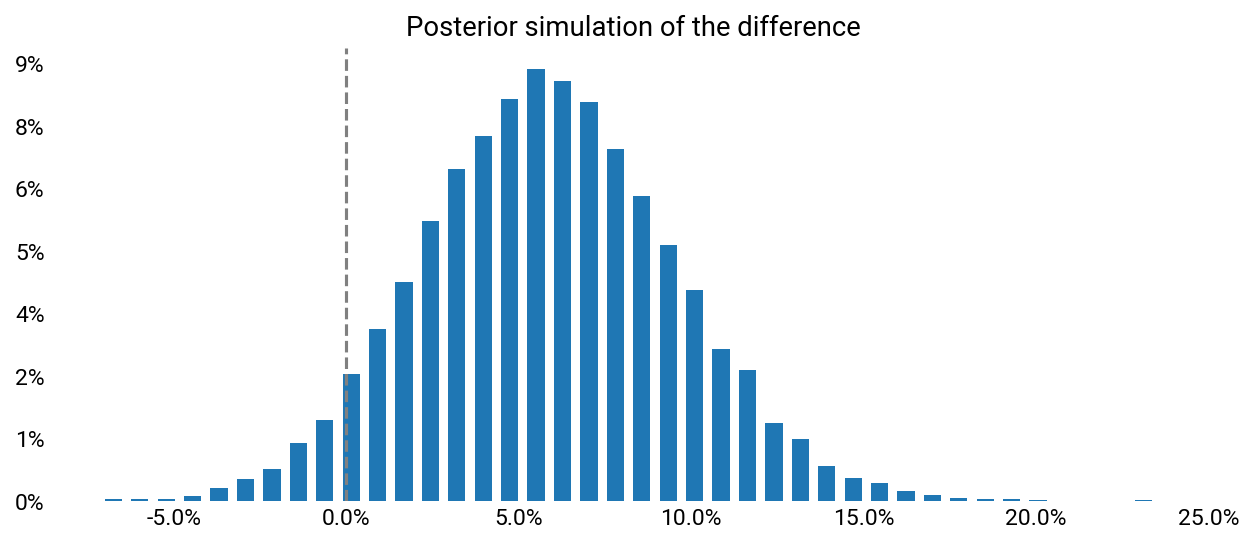

In [10]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

ax.hist(difference, bins=40, width=0.005)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.axvline(0, color='grey', linestyle='--')

sns.despine(left=True, bottom=True)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(x/len(difference), '.0%')))

plt.title('Posterior simulation of the difference')
plt.show()

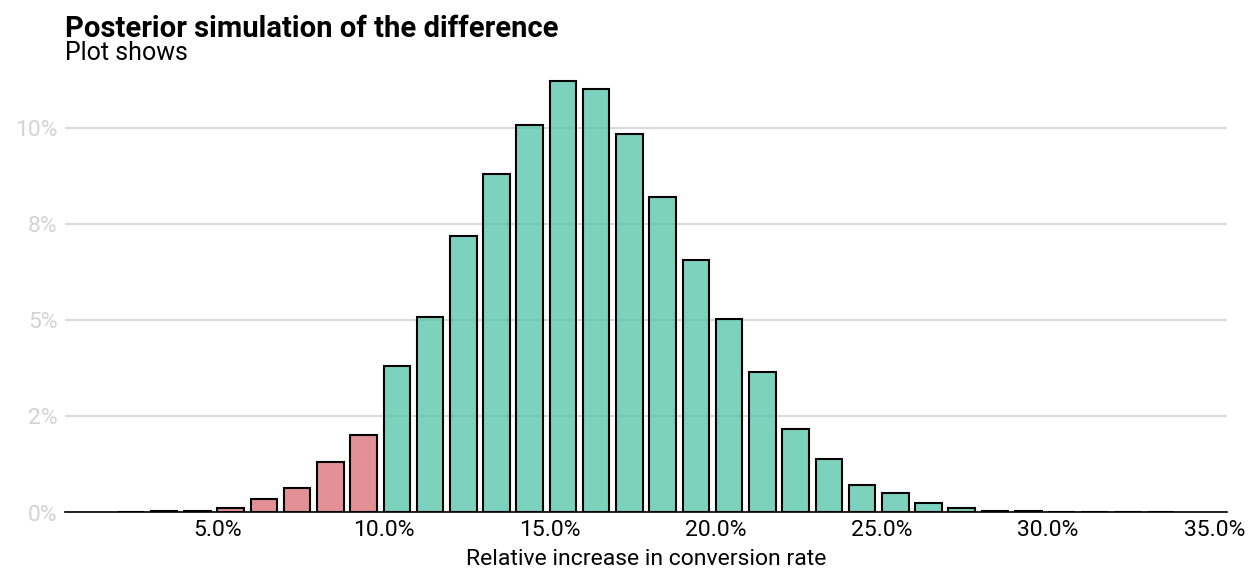

In [11]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

ax.yaxis.grid(color = 'lightgrey')
ax.set_axisbelow(True)

sns.histplot(
    greater, binwidth=0.01,
    color='#51c4a8', shrink=0.8
    )

if lower.size != 0:
    lower_limit = round_decimals_down(lower.min())

    sns.histplot(
    lower, binwidth=0.01, 
    binrange=(lower_limit, 0),
    color='#da6d75', shrink=0.8
    )

ax.set_xlabel('Relative increase in conversion rate')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

# Set yaxis tick labels to %age format
ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(x/len(difference), '.0%')))
ax.set_ylabel('')

# Remove grid
sns.despine(left=True)

# Remove tick marks
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='y', colors='lightgrey')

ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1]*1.05,
    'Posterior simulation of the difference',
    **roboto_title
)

ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1],
    'Plot shows',
    **roboto
)

plt.show()

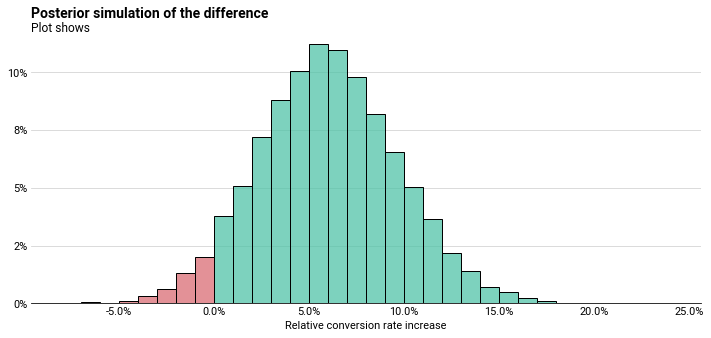

In [14]:
def plot_simulation_of_difference(samples_A, samples_B, ax):

    difference = samples_posterior_B/samples_posterior_A-1

    greater = difference[difference > 0]
    lower = difference[difference < 0]

    sns.histplot(
        greater, binwidth=0.01,
        color='#51c4a8'
        )

    if lower.size != 0:
        lower_limit = round_decimals_down(lower.min())

        sns.histplot(
        lower, binwidth=0.01, 
        binrange=(lower_limit, 0),
        color='#da6d75'
        )

    ax.yaxis.grid(color = 'lightgrey')
    ax.set_axisbelow(True)
    ax.set_ylabel('')

    ax.set_xlabel('Relative conversion rate increase')

    ax.get_yaxis().set_major_formatter(
        mtick.FuncFormatter(lambda x, p: format(x/len(difference), '.0%')))

    sns.despine(left=True)

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

    ax.tick_params(axis=u'both', which=u'both',length=0)

    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[1]*1.05,
        'Posterior simulation of the difference',
        **roboto_title
    )

    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[1],
        'Plot shows',
        **roboto
    )
    plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
plot_simulation_of_difference(samples_posterior_A, samples_posterior_B, ax)

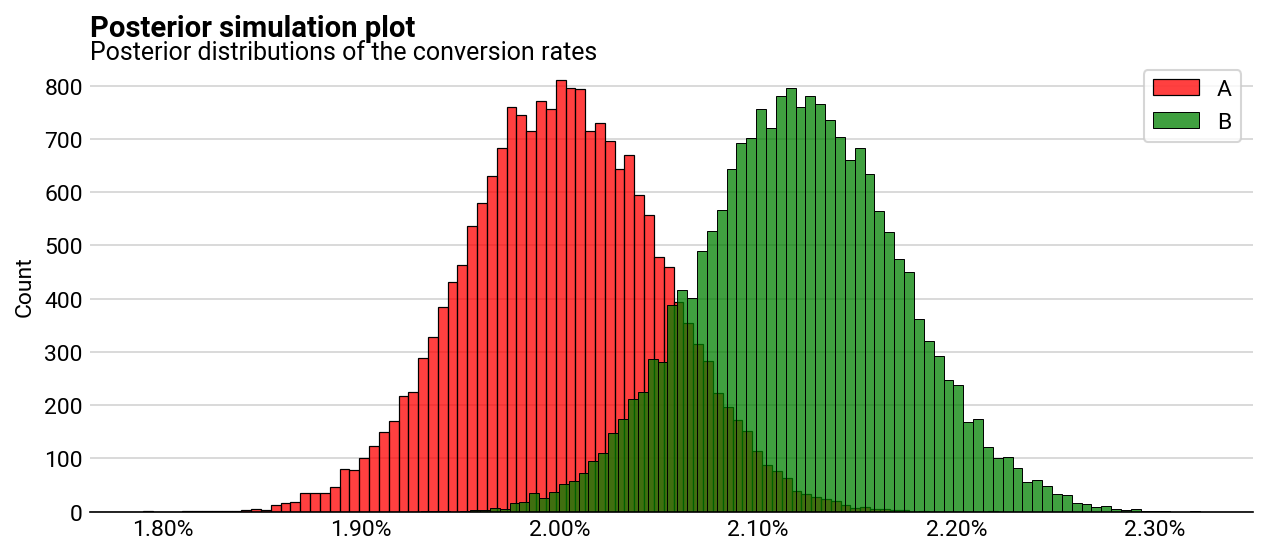

In [13]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

sns.histplot(
    samples_posterior_A, color='red', label='A'
    )
sns.histplot(
    samples_posterior_B, color='green', label='B'
    )

ax.yaxis.grid(color = 'lightgrey')
ax.set_axisbelow(True)

sns.despine(left=True)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1]*1.05,
    'Posterior simulation plot',
    **roboto_title
)

ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1],
    'Posterior distributions of the conversion rates',
    **roboto
)

plt.legend()

plt.show()